### Decision tree
- Decision trees follow an intuitive process to make predictions—one that very much resembles human reasoning.

-  ![](./figures/basic_decision_tree.jpeg)

- The nodes that have two branches emanating from them are called **decision nodes**, and the nodes with no branches emanating from them are called leaf nodes, or leaves.

- The simplest possible decision tree, called a **decision stump**, is formed by a single decision node (the root node) and two leaves. This represents a single yes-or-no question

- ![](./figures/decision_tree_1.jpeg)

- **How to build this tree ?**
- Computers don’t have experience per se, but they have something similar, which is data. Here we will have records having lot of features.
- If we wanted to think like a computer, we could just go over all possible trees, try each one of them for some time—say, one year—and compare how well they did by counting how many times we made the right decision using each tree.

- Unfortunately, even for a computer, searching over all the possible trees to find the most effective one would take a really long time.

- But luckily, we have algorithms that make this search much faster, and thus, we can use decision trees for many wonderful applications, includ- ing spam detection, sentiment analysis, and medical diagnosis.

- Each decision node is a question, and each leaf is a prediction. So if we have a set of Questions then we can build a decision tree based on it.

- This works for both **classification and regression**.

- But there are few question arises for this.
- **How exactly do you decide which is the best possible question to ask?**
    - We have several ways to do this. The simplest one is using accuracy, which means: which question helps me be correct more often? -> ( **Gini index** or **entropy**)
- **Does the process of always picking the best possible question actually get us to build the best decision tree?**
    -  Actually, this process does not guarantee that we get the best possible tree. This is what we call a greedy algorithm.
- **Why don’t we instead build all the possible decision trees and pick the best one from there?**
    -  The problem is that there are so many possible decision trees that it would take a very long time to try them all.
- **Where can we find decision trees in real life?**
    - They are used extensively in machine learning, not only because they work very well but also because they give us a lot of information on our data. As this explains our model well.


#### Example Building a decision tree

- We have below data.

| Platform | Age    | App |
| ---------| -----  | --- |
| iphone    | Young | Atom Count |
| iphone    | Adult | Check Mate Mate  |
| Android   | Adult | Beehive Finder |
| iphone    | Adult | Check Mate Mate| 
| Android   | Young | Atom Count|
| Android   | Young | Atom Count   |

- Finding the best question to ask.
 - Either the first question will be  **is iphone** ? or **is Young** ? 
    - lets take **is iphone** ? this will split the data into two groups.
        - ![](./figures/by_platform.jpeg)

    - lets take **is Young** ? this also split the data into two groups.
        - ![](./figures/by_age.jpeg)
 
- We can see that split by age is better, as it figure out a clean boundary between two groups.
- We need a way for computer to figure out the best question to ask.

- There are 3 ways computer will figure out the best question to ask.
    - **Accuracy**
    - **Gini index** or  **Gini impurity index**
    - **Entropy**


##### Accuracy    How often is our model correct? 
- **Accuracy** is the fraction of correctly classified data points over the total number of data points.
    - **Classifier1**: What platform do you use?
        - iphone: the majority iphone user using checkmate, we will recommend checkmate, This classifier is correct 2 out of 3 times.
        - Android: the majority android user using atomcount, we will recommend atomcount, This classifier is correct 2 out of 3 times.
        
    - **Classifier2**: What is the age ?
        - Young: the majority young user using atomcount, we will recommend atomcount, This classifier is correct 3 out of 3 times.
        - Adult: the majority adult user using checkmate, we will recommend checkmate, This classifier is correct 2 out of 3 times.
    - Classifier2 is better than Classifier1, as it is correct 5 out of 6 times.   classifier 1 accurecy is 4/6 = 66.6% and classifier 2 accurecy is 5/6 = 83.3%
     
##### Gini index or Gini impurity index: How diverse is our group?        
- In other words, if we have a set in which all the elements are similar, this set has a low Gini index, and if all the elements are different, it has a large Gini index
    - **Set 1**: eight red balls, two blue balls
    - **Set 2**: four red balls, three blue balls, two yellow balls, one green ball
-  If we pick two random elements of the set, what is the probability that they have a different color?   
    - `P(picking two balls of different color) = 1 – P(picking two balls of the same color)`
    - `P(picking two balls of the same color) = P(both balls are color 1) + P(both balls are color 2) + ... + P(both balls are color n)`

    - In general, if pi is the probability that we pick a random ball and it is of color i, then      P(both balls are color i) = pi^2.
    - `P(picking two balls of different colors) = 1 – p1^2 – p2^2 – ... – pn^2`.

- Set 1: {red, red, red, red, red, red, red, red, blue, blue} (eight red balls, two blue balls)
    - Gini index = 1 - (8/10)^2 - (2/10)^2 = 0.32
- Set 2: {red, red, red, red, blue, blue, blue, yellow, yellow, green}
    - Gini index = 1 - (4/10)^2 - (3/10)^2 - (2/10)^2 - (1/10)^2 = 0.7    

- **Applying Gini index to our data**   
  - Classifier 1 (by platform):
      - Left leaf (iPhone): {A, C, C}
      - Right leaf (Android): {A, A, B}
  - Classifier 2 (by age):
      - Left leaf (young): {A, A, A}
      - Right leaf (adult): {B, C, C}
  - The Gini indices of the sets {A,C,C},{A,A,B},and{B,C,C}areallthesame: 1−(3/6)^2 −(2/6)^2 = 0.444.
  - The Gini index of the set {A,A,A} is 1−(3/3)^2 =0.Ingeneral,the Gini index of a pure set is always 0.  
  - Classifier 1's Average Gini index is `(0.444 + 0.444 )/2 = 0.444`.   
  - Classifier 2's Average Gini index is `(0 + 0.444 )/2 = 0.222`. 
  - We conclude that the second split is better, because it has a lower average Gini index.  

#### Entropy
- **Think of entropy as a measure of surprise or chaos.**

- **Intuitive example: Imagine a bag of marbles:**

    - Bag A: 10 red marbles, 0 blue marbles → You always pick red. No surprise! Low entropy.
    - Bag B: 5 red marbles, 5 blue marbles → You never know what you'll get. Maximum surprise! High entropy.
    - Bag C: 9 red marbles, 1 blue marble → Mostly red, but occasionally blue. Some surprise. Medium entropy.

- In machine learning terms, if all your data points belong to the same class (like all emails being "spam"), entropy is 0. If they're evenly mixed between classes, entropy is at its maximum.

- **The goal**: **Split your data in a way that reduces entropy the most**. After splitting, you want each group to be more predictable than before.

#### Gini Index
- Think of gini index as measuring impurity or the probability of being wrong if you randomly guess a label. (explained above)
- **The goal**: Same as entropy—find splits that minimize the gini index, making each group as pure as possible.


#### Information Gain
- Information gain measures **how much better organized your data becomes after a split**. It's literally the "gain" in information (or reduction in chaos) you get from splitting.

- **Simple Analogy**:
    
    - Imagine you're a teacher organizing students for a field trip:
        - Before split: You have 20 students all mixed together - some want to go to the museum, some to the zoo. It's chaotic trying to figure out what to do.
        
        - After split: You ask "Do you like animals?"
            - Left group: 9 students who said "yes" → 8 want zoo, 1 wants museum
            - Right group: 11 students who said "no" → 2 want zoo, 9 want museum

- Now each group is much more organized! The question "Do you like animals?" gave you valuable **information gain**.

    - **The Formula (Conceptually)**: `Information Gain = (Chaos before split) - (Chaos after split)`
    - **The Formula (Mathematically)**: `Information Gain = Entropy(parent) - Weighted Average of Entropy(children)`

#### Concrete Example with Numbers
- Let's say you're predicting if someone will buy a product (Yes/No):

- *Before any split*:
    - 10 people: 6 buy, 4 don't buy
    - This is somewhat mixed, so there's some entropy/chaos

- **Split option 1: Age < 25**
    - Left (Age < 25): 3 people → 3 buy, 0 don't → Very pure!
    - Right (Age ≥ 25): 7 people → 3 buy, 4 don't → Still mixed

- **Split option 2: Income > 50k**
    - Left (Income > 50k): 5 people → 5 buy, 0 don't → Very pure!
    - Right (Income ≤ 50k): 5 people → 1 buy, 4 don't → Pretty pure!

- These 2 splits are definitely better than parent group of all, 
    - **High chaos** = low information (you don't know much)
    - **Low chaos** = high information (you know a lot)

- When you reduce chaos through a good split, you **gain** information about your data.  

#### The Decision Tree's Strategy
- At each step, the tree:
    - Tries all possible splits
    - Calculates information gain for each
    - Picks the split with the highest information gain
    - Repeats for each resulting group

- It's like solving a puzzle by always making the move that reveals the most about the solution!

#### lets understand Information Gain formula
- Information Gain = Entropy(parent) - Weighted Average of Entropy(children)

- **Entropy(parent)**: Measures the chaos in the parent group. If all emails are spam, entropy is 0. If they're evenly mixed, it's at its maximum.

- **Weighted Average of Entropy(children)**: For each split, calculate the entropy of each child group and take a weighted average based on the size of each group. This gives you the total chaos after the split.

- **Information Gain**: The difference between the chaos before and after the split. Higher information gain means the split is better.

- **why weighted average?**
    - **The key insight**: Not all splits create equal-sized groups, and bigger groups matter more!

    - **Intuitive Example**
        - Imagine you have 100 students and you want to go for field trip to either zoo or museum. you're splitting 100 students based on "Do you wear glasses?" it will result into an unbalced split.
        - **Scenario 1: Unbalanced split(Do you wear glasses?)**
            - Wear glasses: 10 students → perfectly pure (all want museum)
            - Don't wear glasses: 90 students → totally mixed (45 museum, 45 zoo)
            
        - **Scenario 2: Balanced split(Do you like animals?)**
            - Group A: 50 students → perfectly pure (all want museum)
            - Group B: 50 students → totally mixed (25 museum, 25 zoo)

        - **Which is better?** Scenario 2! Even though both have one pure group and one mixed group, Scenario 2 is better because the pure group is larger—it affects more students. 

        - **Why Simple Average Doesn't Work**
            - If we just averaged the entropies without  weights:
                - Scenario 1:
                    - Entropy of left (10 students) = 0 (pure)
                    - Entropy of right (90 students) = high (mixed)
                    - Simple average = (0 + high) / 2 = medium

                - Scenario 2:
                    - Entropy of left (50 students) = 0 (pure)
                    - Entropy of right (50 students) = high (mixed)
                    - Simple average = (0 + high) / 2 = medium

            - They'd look the same! But clearly Scenario 2 is better since it organizes more students.  

        - **How Weighted Average Works**
            - We multiply each group's entropy by the proportion of data points in that group:
            -   `Weighted Average = (Size of Left / Total Size) × Entropy(Left) + (Size of Right / Total Size) × Entrop(Right)` 
            - **Scenario 1 with weights:**
                ``` 
                    Weighted Avg = (10/100) × 0 + (90/100) × high
                    = 0 + 0.9 × high
                    = mostly high (bad!) 
                ```
            - Scenario 2 with weights:
                ```
                    Weighted Avg = (50/100) × 0 + (50/100) × high
                    = 0 + 0.5 × high
                    = mostly low (good!)
                ``` 
            - **Now we can see Scenario 2 is actually better!**


  

#### Math Formula for Entropy

- Entropy = -Σ(pᵢ × log(pᵢ))

#### DecisionTreeClassifier

In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn import set_config
# Force sklearn to print all parameters, even default ones
set_config(print_changed_only=False)

import random
random.seed(0)


##### Lets create our apps recommendation dataset

In [2]:
app_dataset = pd.DataFrame({
    'Platform': ['iPhone','iPhone','Android','iPhone','Android','Android'],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']})
app_dataset

,Platform,Age,App
0,iPhone,15,Atom Count
1,iPhone,25,Check Mate Mate
2,Android,32,Beehive Finder
3,iPhone,35,Check Mate Mate
4,Android,12,Atom Count
5,Android,14,Atom Count


##### Training a decision tree with age as a categorical feature


In [3]:
app_dataset_one_hot = pd.DataFrame(
    {'Platform_iPhone':[1,1,0,1,0,0],
     'Platform_Android':[0,0,1,0,1,1],
     'Age_Young':[1,0,0,0,1,1],
     'Age_Adult':[0,1,1,1,0,0],
     'App_Atom_Count':[1,0,0,0,1,1],
     'App_Beehive_Finder':[0,0,1,0,0,0],
     'App_Check_Mate_Mate':[0,1,0,1,0,0]})
app_dataset_one_hot

,Platform_iPhone,Platform_Android,Age_Young,Age_Adult,App_Atom_Count,App_Beehive_Finder,App_Check_Mate_Mate
0,1,0,1,0,1,0,0
1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0
5,0,1,1,0,1,0,0


In [4]:
X = app_dataset_one_hot[['Platform_iPhone','Platform_Android','Age_Adult','Age_Young']]
y = app_dataset_one_hot[['App_Atom_Count','App_Beehive_Finder','App_Check_Mate_Mate']]

dt = DecisionTreeClassifier()
dt.fit(X,y)

print(dt.feature_importances_)
print(dt.score(X,y))

[0.36363636 0.         0.         0.63636364]
1.0


[Text(0.6, 0.8333333333333334, 'X[3] <= 0.5\ngini = 0.407\nsamples = 6\nvalue = [[3, 3]\n[5, 1]\n[4, 2]]'),
 Text(0.4, 0.5, 'X[0] <= 0.5\ngini = 0.296\nsamples = 3\nvalue = [[3, 0]\n[2, 1]\n[1, 2]]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [[2, 0]\n[2, 0]\n[0, 2]]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [[0, 3]\n[3, 0]\n[3, 0]]')]

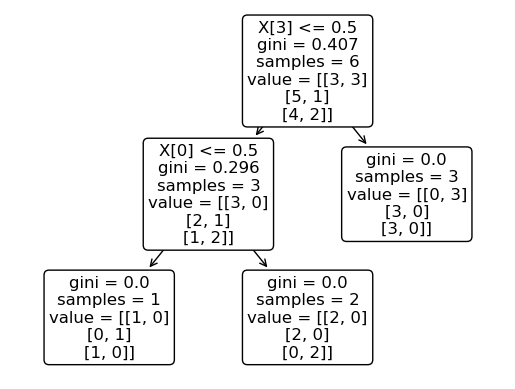

In [5]:
tree.plot_tree(dt, rounded=True)


##### Training a decision tree with age as a numerical feature


In [6]:
app_dataset = pd.DataFrame({
    'Platform_iPhone':[1,1,0,1,0,0],
    'Platform_Android':[0,0,1,0,1,1],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Atom Count', 'Check Mate Mate', 'Beehive Finder', 'Check Mate Mate', 'Atom Count', 'Atom Count']})
print(app_dataset)

   Platform_iPhone  Platform_Android  Age              App
0                1                 0   15       Atom Count
1                1                 0   25  Check Mate Mate
2                0                 1   32   Beehive Finder
3                1                 0   35  Check Mate Mate
4                0                 1   12       Atom Count
5                0                 1   14       Atom Count


In [7]:
features = app_dataset[['Age','Platform_iPhone','Platform_Android']]
print(features)

labels = app_dataset['App']
print(labels)

   Age  Platform_iPhone  Platform_Android
0   15                1                 0
1   25                1                 0
2   32                0                 1
3   35                1                 0
4   12                0                 1
5   14                0                 1
0         Atom Count
1    Check Mate Mate
2     Beehive Finder
3    Check Mate Mate
4         Atom Count
5         Atom Count
Name: App, dtype: object


In [8]:
app_model = DecisionTreeClassifier()
app_model.fit(features, labels)
print(app_model.score(features, labels))
print(app_model.feature_importances_)

1.0
[0.63636364 0.         0.36363636]


[Text(0.4, 0.8333333333333334, 'X[0] <= 20.0\ngini = 0.611\nsamples = 6\nvalue = [3, 1, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.6, 0.5, 'X[2] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]')]

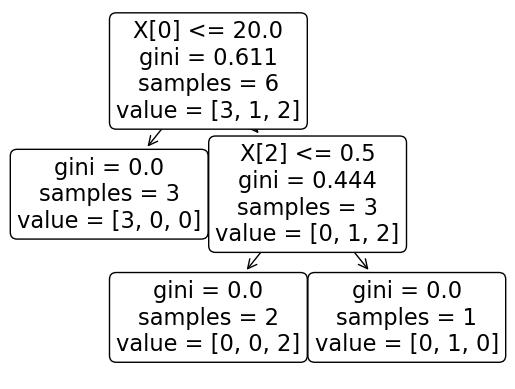

In [9]:
tree.plot_tree(app_model, rounded=True)


##### Utility method to print the decisionTree

In [10]:
#!pip install pydotplus
#!pip install graphviz


In [11]:
# Some functions to plot our points and draw the models
def plot_points(features, labels, size_of_points=100):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = size_of_points,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    plt.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = size_of_points,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    #pyplot.xlabel('GRE')
    #pyplot.ylabel('TOEFL')
    #pyplot.legend(['Admitted','Not admitted'])

def plot_model(X, y, model, size_of_points=100):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 1)
    plot_points(X, y, size_of_points)
    plt.show()
    
def display_tree(dt):
    from io import StringIO 
    from IPython.display import Image  
    from sklearn.tree import export_graphviz
    import pydotplus
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [12]:
# test dataset
dataset = pd.DataFrame({
    'x_0':[7,3,2,1,2,4,1,8,6,7,8,9],
    'x_1':[1,2,3,5,6,7,9,10,5,8,4,6],
    'y': [0,0,0,0,0,0,1,1,1,1,1,1]})

dataset

,x_0,x_1,y
0,7,1,0
1,3,2,0
2,2,3,0
3,1,5,0
4,2,6,0
5,4,7,0
6,1,9,1
7,8,10,1
8,6,5,1
9,7,8,1


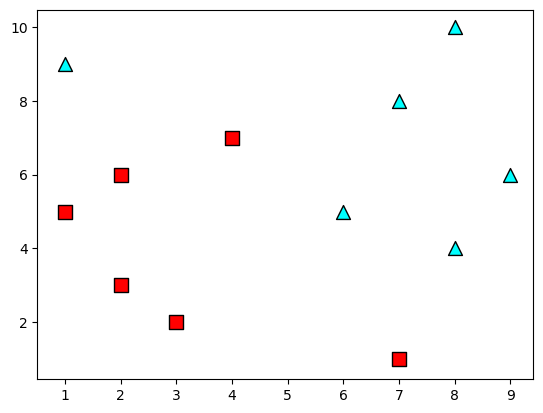

In [13]:
features = dataset[['x_0', 'x_1']]
labels = dataset['y']

plot_points(features, labels)

##### Building a decision tree using Gini index


[Text(0.5, 0.8333333333333334, 'X[0] <= 5.0\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.25, 0.5, 'X[1] <= 8.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'X[1] <= 2.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

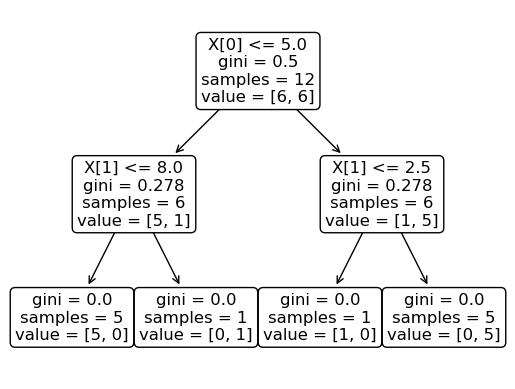

In [15]:
decision_tree = DecisionTreeClassifier(criterion="gini", max_depth=3)
decision_tree.fit(features, labels)
decision_tree.score(features, labels)

tree.plot_tree(decision_tree, rounded=True)


#### Predicting university admission chances

In [26]:
student_data = pd.read_csv('./data/Admission_Predict.csv', index_col=0)
student_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [27]:
student_data['Admitted'] = student_data['Chance of Admit'] >= 0.75
student_data.drop(columns=['Chance of Admit'], inplace=True)
student_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,True
2,324,107,4,4.0,4.5,8.87,1,True
3,316,104,3,3.0,3.5,8.00,1,False
4,322,110,3,3.5,2.5,8.67,1,True
5,314,103,2,2.0,3.0,8.21,0,False


In [28]:
student_features =  student_data.drop(["Admitted"], axis=1)
labels = student_data["Admitted"]
student_features.head()
#student_features.shape

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0


In [30]:
dt = DecisionTreeClassifier()
dt.fit(student_features,labels)
dt

DecisionTreeClassifier()

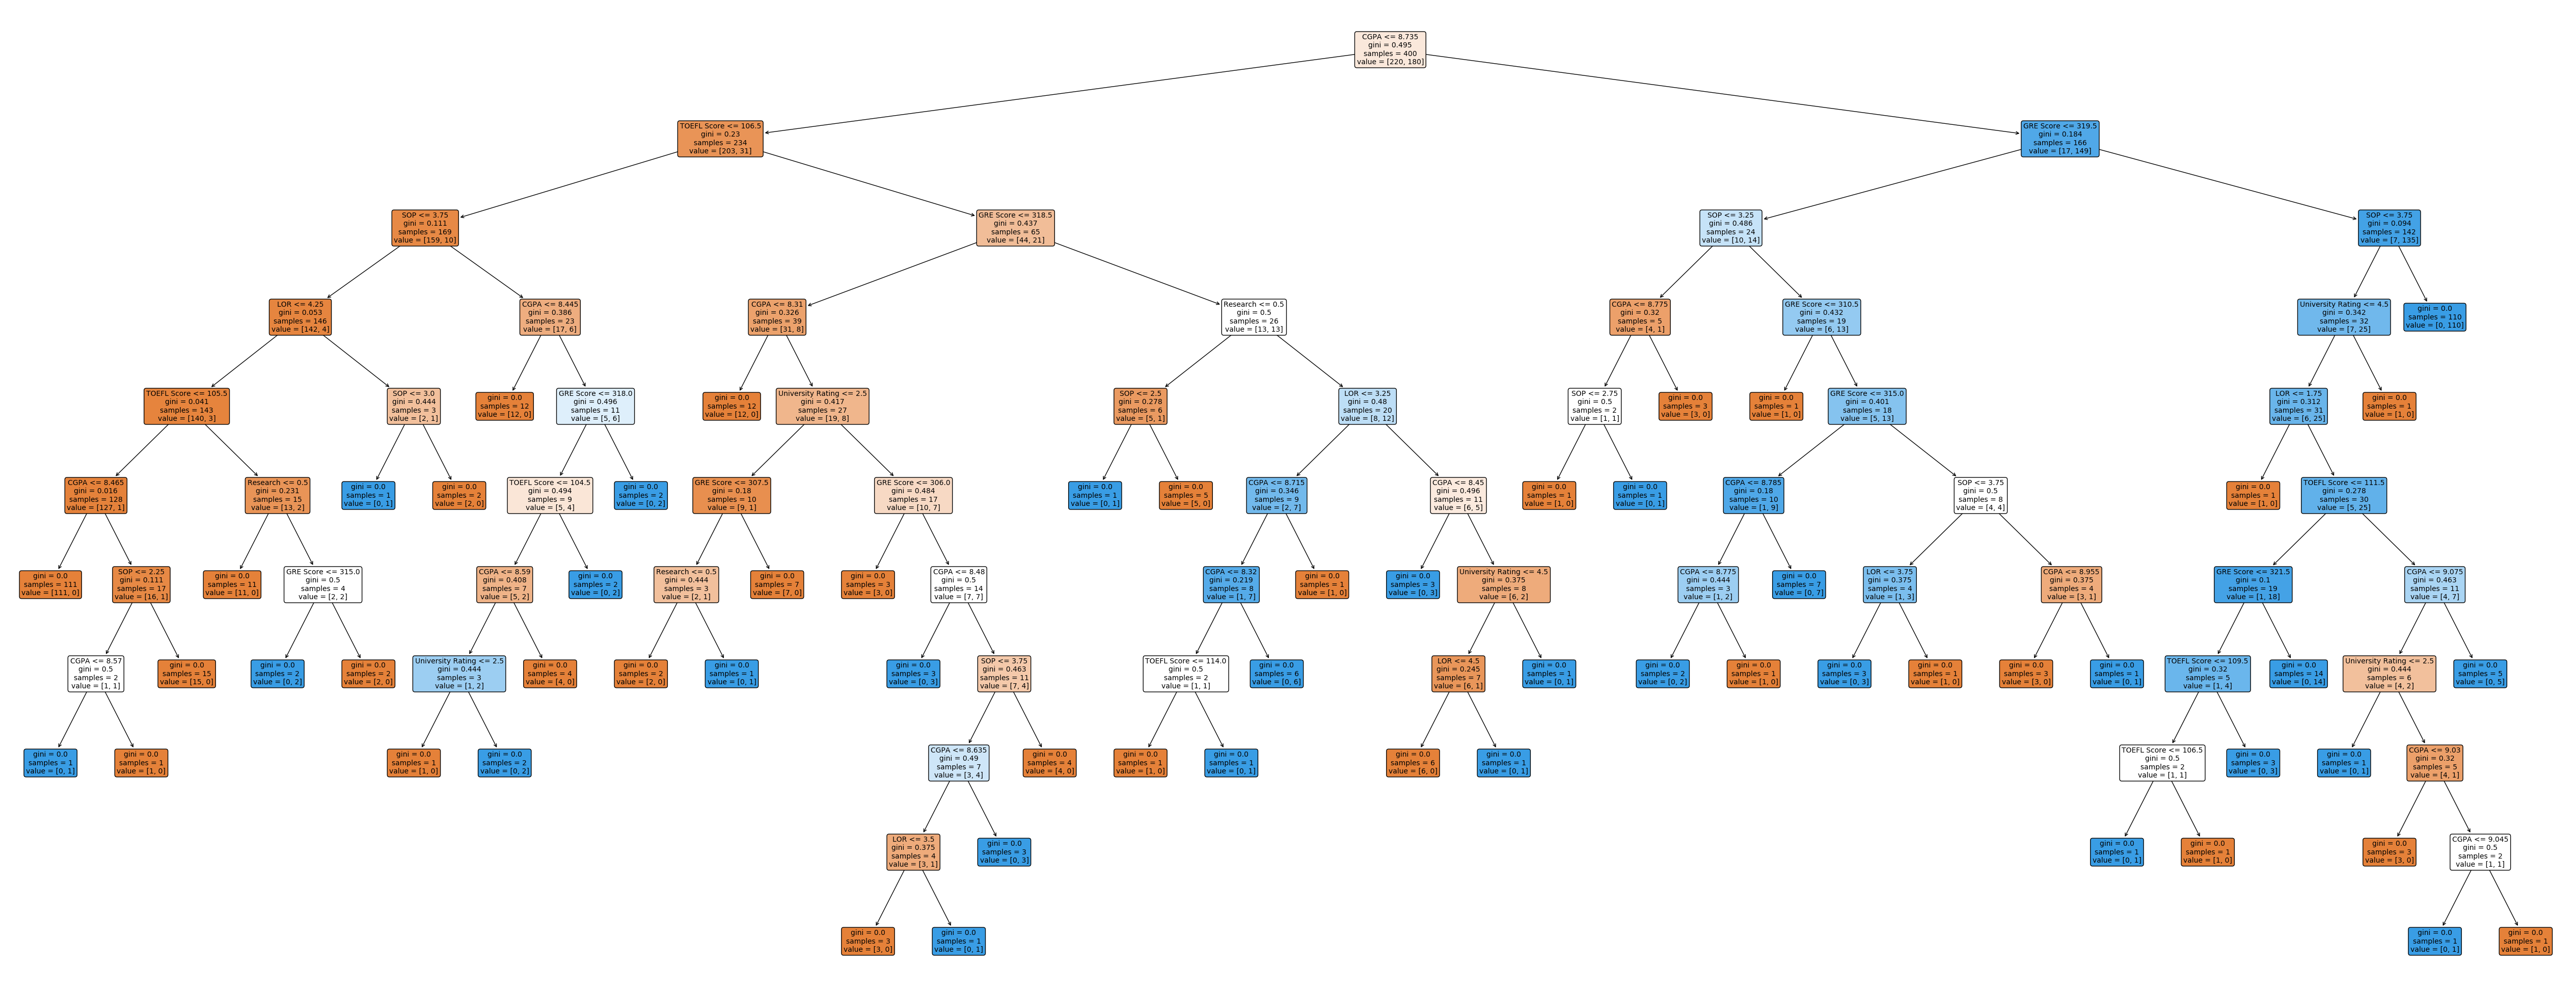

In [40]:
plt.figure(figsize=(65, 25))  # Increase figure size
tree.plot_tree(dt, 
               rounded=True, 
               filled=True,                # Add colors to nodes
               feature_names=student_features.columns.tolist(), # Show feature names
               fontsize=10)                # Adjust font size
plt.show()


In [34]:
dt.predict(student_features[5:10])

array([ True,  True, False, False, False])

In [ ]:
dt.score(student_features, labels).  # 

1.0

##### Notice:  the tree is trying to fit as much as possible, which may overfit. We can control the overfitting by setting the max_depth and other tunning parameter.
- we can see that its score is 100%, which means it has overfitted the data.
- We can also print the  predicted class name for each node, we can print the class name for each node using `class_names` parameter in the `plot_tree` function.

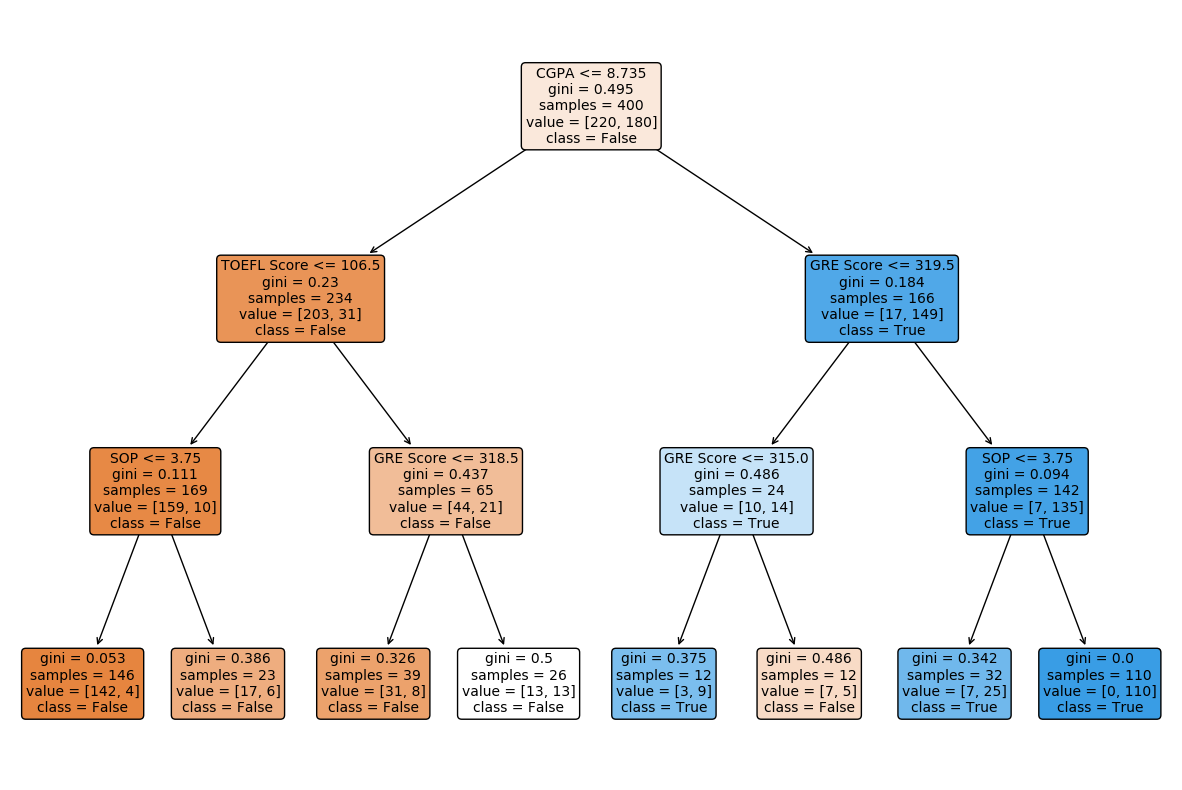

In [ ]:
dt_smaller = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)
dt_smaller.fit(student_features, labels)


# We need to convert boolean classes to strings manually, As tree.plot_tree does not support boolean classes
str_classes = [str(c) for c in dt_smaller.classes_]

plt.figure(figsize=(15, 10))  # Increase figure size
tree.plot_tree(dt_smaller, 
               rounded=True, 
               filled=True,                # Add colors to nodes
               feature_names=student_features.columns.tolist(), # Show feature names
               fontsize=10, # Adjust font size
               class_names=str_classes, # Show the predicted classes in the nodes
               )                
plt.show()


In [44]:
dt_smaller.score(student_features, labels)

0.885

#### Using the tree to make predictions

In [55]:
dt_smaller.predict([[20,
                     40,
                     3,
                     4.0,
                     3.5,
                     8.9,
                     0]])

/opt/miniconda3/envs/lap/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([ True])

#### Looking inside the Decision Tree model

In [82]:
# Shows the importance score for each feature (sums to 1)
print(f"**importance scores for each features: {dt.feature_importances_}")

print("\n*** tree structure***")
print(f"Total nodes: {dt.tree_.node_count}")
print(f"Tree depth: {dt.tree_.max_depth}")

print("*** tree structure***\n")

print(f"Features seen during fit: {dt.n_features_in_}")
print(f"Feature names: {dt.feature_names_in_}")
print(f"Number of classes: {dt.n_classes_}")


# Clean Feature Importance Printout
import pandas as pd
importances = pd.Series(dt.feature_importances_, index=student_features.columns)
print("\nFeature Importances:")
print(importances.sort_values(ascending=False))

#Print all the param of he model
print(f"all param: {dt.get_params()}"  )



**importance scores for each features: [0.07914996 0.06311647 0.0311604  0.07040086 0.03871757 0.69455912
 0.02289562]

*** tree structure***
Total nodes: 115
Tree depth: 10
*** tree structure***

Features seen during fit: 7
Feature names: ['GRE Score' 'TOEFL Score' 'University Rating' 'SOP' 'LOR' 'CGPA'
 'Research']
Number of classes: 2

Feature Importances:
CGPA                 0.694559
GRE Score            0.079150
SOP                  0.070401
TOEFL Score          0.063116
LOR                  0.038718
University Rating    0.031160
Research             0.022896
dtype: float64
all param: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


#### Training a Decision Tree with same data with less features

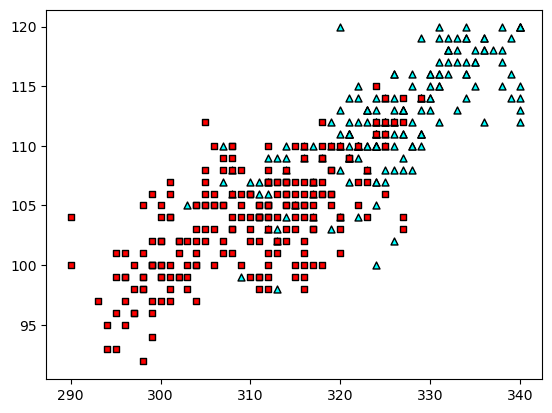

In [76]:
student_data = pd.read_csv('./data/Admission_Predict.csv', index_col=0)

exams = student_data[['GRE Score', 'TOEFL Score']]
exams.head()
plot_points(exams, labels, size_of_points=25)

In [80]:
dt_exams = DecisionTreeClassifier(max_depth=2)
dt_exams.fit(exams, labels)
dt_exams.score(exams, labels)
dt_exams.get_params()


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

/opt/miniconda3/envs/lap/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


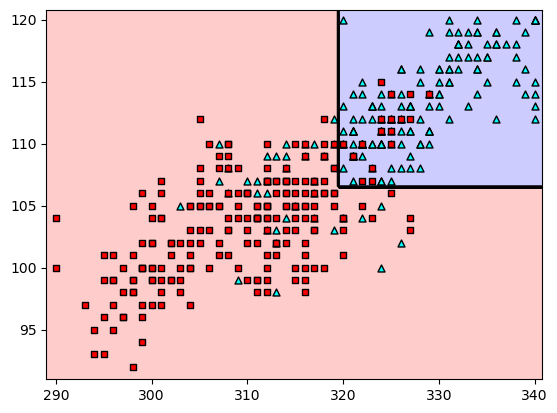

In [86]:
plot_model(exams, labels, dt_exams, size_of_points=25)

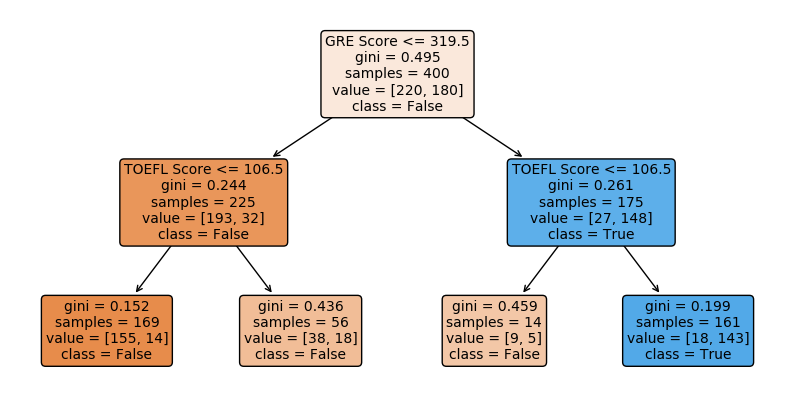

In [88]:
plt.figure(figsize=(10, 5))  # Increase figure size
tree.plot_tree(dt_exams, 
               rounded=True, 
               filled=True,                # Add colors to nodes
               feature_names=student_features.columns.tolist(), # Show feature names
               fontsize=10, # Adjust font size
               class_names=str_classes, # Show the predicted classes in the nodes
               )                
plt.show()

#### fit the tree with depth of 1

/opt/miniconda3/envs/lap/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


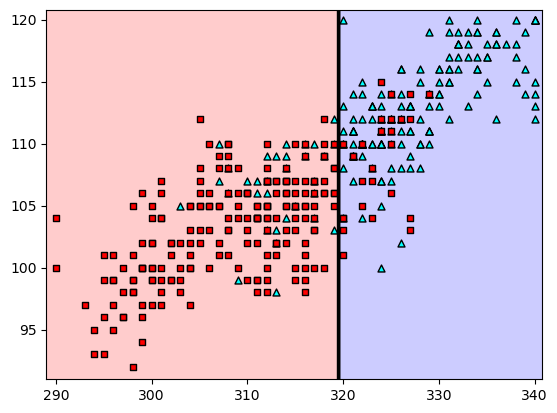

In [89]:
simpler_dt_exams = DecisionTreeClassifier(max_depth=1)
simpler_dt_exams.fit(exams, labels)
plot_model(exams, labels, simpler_dt_exams, size_of_points=25)

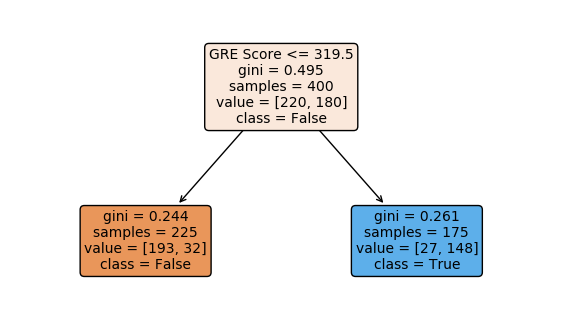

In [91]:
plt.figure(figsize=(7, 4))
tree.plot_tree(simpler_dt_exams, 
               rounded=True, 
               filled=True,                # Add colors to nodes
               feature_names=student_features.columns.tolist(), # Show feature names
               fontsize=10, # Adjust font size
               class_names=str_classes, # Show the predicted classes in the nodes
               )                
plt.show()

#### Lets create a Decision tree with a very high depth, and see how it divides the data.
- in below example you can see that it divides the data into very small regions.which is overfitting.

In [107]:
crazy_dt_exams = DecisionTreeClassifier(max_depth=10)
crazy_dt_exams.fit(exams, labels)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

/opt/miniconda3/envs/lap/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


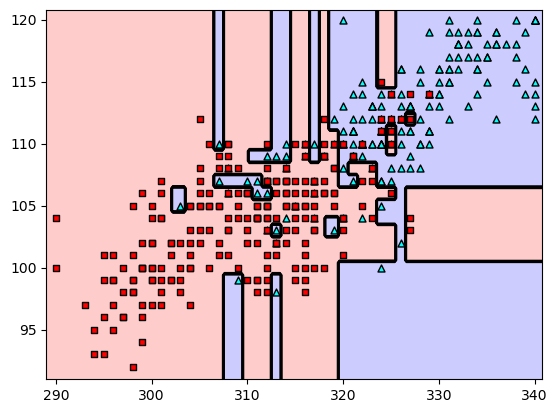

In [111]:
plot_model(exams, labels, crazy_dt_exams, size_of_points=25)

### Decision trees for regression

- The algorithm used for training a regression decision tree is very similar to the one we used for training a classification decision tree.
- The only difference is that **for classification trees, we used accuracy, Gini index, or entropy**, and **for regression trees, we use the mean square error (MSE)**. 
- We can use **DecisionTreeRegressor** class from the **sklearn.tree** module to train a regression decision tree.
    - if we print the model, we can see that it is simillar with **criterion='squared_error'**. 

- **lets take a small example**
    - We have 2 columns, first one is Age, and the second one is number of time they palyed with the game in a week.


In [ ]:


# Original data
ages = [[10],[20],[30],[40],[50],[60],[70],[80]]
days_per_week = [7,5,7,1,2,1,5,4]

# Method 1: Create DataFrame directly
df = pd.DataFrame({
    'Age': [f[0] for f in ages],  # Extract age from nested lists
    'Days_per_week': days_per_week
})

features = df[['Age']]
labels = df['Days_per_week']

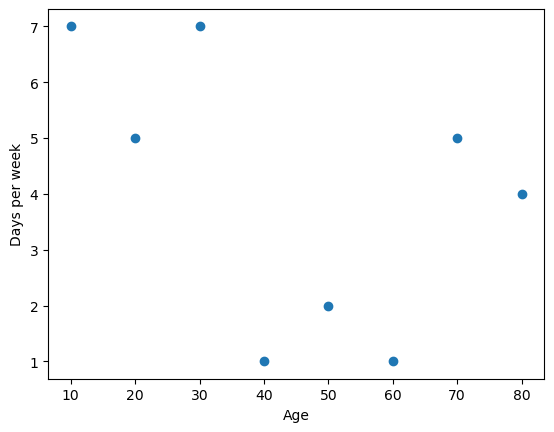

In [131]:
plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

#### lets experiment with level of depth with 1,

In [149]:
from sklearn.tree import DecisionTreeRegressor
# Lets put depth as 1 to make it a decision tree, So that it will devide all the elements into 2 parts.
# So for each part it will predict one value. and count a Mean square error for each part.
dt_regressor = DecisionTreeRegressor(max_depth=1) 
dt_regressor.fit(features, labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

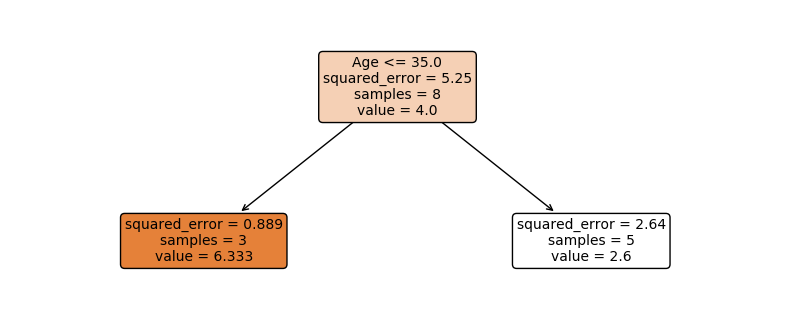

In [ ]:
# In this example, you can see the decision tree for a regression model. It divide the data into different regions based on the features.
# And for the first group it predicted the value is 6.33 and for second it predicted the value is 2.6
# So here the splittimng is very simple,it is based on Age, if Age less that 36 it will predict 6.33 and if Age is more than 36 it will predict 2.6.
# So there is a clear line at Age=35

plt.figure(figsize=(10, 4))
tree.plot_tree(dt_regressor, 
               rounded=True, 
               filled=True,                # Add colors to nodes
               fontsize=10, # Adjust font size
               feature_names=features.columns,
               )                
plt.show()

#### Helper utility to print the Decision Tree model for regression.

In [160]:
def plot_regressor(model, features, labels):
    x = np.linspace(0,85,1000) # creates 1000 points in the line space from 0-85
    plt.scatter(features, labels, label="Actual") # only plot the points
    plt.plot(x, model.predict(x.reshape([-1,1])), color='red', label='Predicted line') # Predict for every point in our linespace and plot the line for predicted values.
    plt.xlabel("Age")
    plt.ylabel("Days per week")
    
    #plt.show()
    return plt

/opt/miniconda3/envs/lap/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


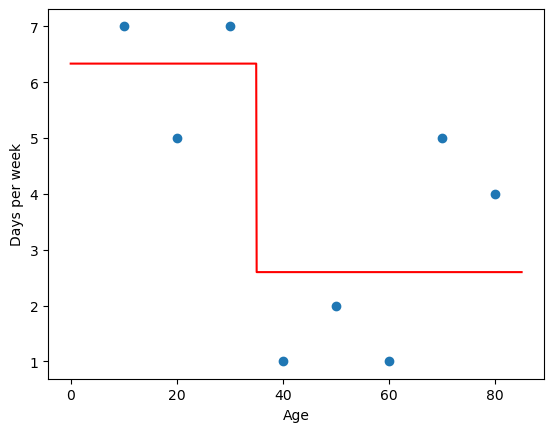

In [148]:
plot_regressor(dt_regressor, features, labels)

##### If you see in above plot, it splits the data into 2 parts, left part is age <=35 and right part is age >35.
##### In left part the prediction is 6.33 and in right part the prediction is 2.6. 

In [144]:
dt_regressor.predict([[35]])

/opt/miniconda3/envs/lap/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([6.33333333])

##### Lets increase the depth to 2.


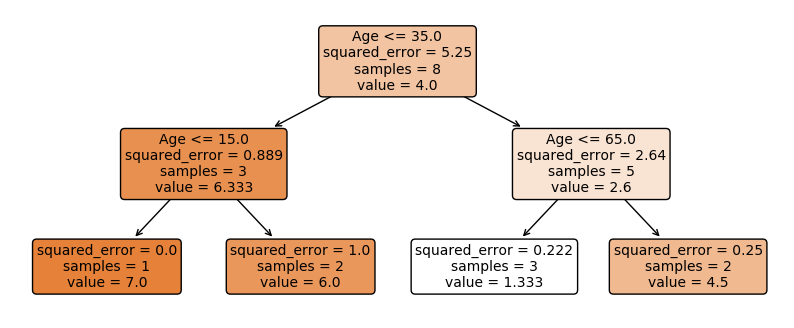

In [151]:
dt_regressor_2 = DecisionTreeRegressor(max_depth=2) 
dt_regressor_2.fit(features, labels)

plt.figure(figsize=(10, 4))
tree.plot_tree(dt_regressor_2, 
               rounded=True, 
               filled=True,                # Add colors to nodes
               fontsize=10, # Adjust font size
               feature_names=features.columns,
               )                
plt.show()


/opt/miniconda3/envs/lap/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


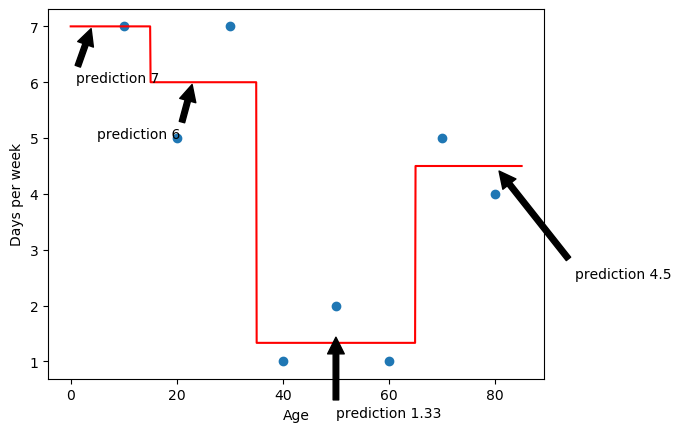

In [185]:
plt = plot_regressor(dt_regressor_2, features, labels)
plt.annotate('prediction 7', xy=(4, 7), xytext=(1, 6),
                 arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('prediction 6', xy=(23, 6), xytext=(5, 5),
                 arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('prediction 1.33', xy=(50, 1.5), xytext=(50, 0),
                 arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('prediction 4.5', xy=(80, 4.5), xytext=(95, 2.5),
                 arrowprops=dict(facecolor='black', shrink=0.05))                                  
plt.show() 


### When we should use DecisionTreeRegressor ve LinearRegression?
- **Non-linear relationship**: 
    - When the features and the target have a non-linear relationship, DecisionTreeRegressor can capture complex patterns and interactions between features.
    - If your data has complex, non-linear patterns (like curves, thresholds, or step functions), decision trees naturally capture these without manual feature engineering.

-  **Feature interactions matter**: 
    - Decision trees automatically capture interactions between features through their splitting logic.
    - With linear regression, you'd need to manually create interaction terms (like x₁ × x₂), which becomes impractical with many features.

- **Mixed data types**: 
    - Decision trees handle both categorical and numerical features seamlessly without requiring extensive preprocessing.  
    - Linear regression typically needs one-hot encoding for categorical variables and careful scaling. 

- **Presence of outliers**:
    - Decision trees are relatively robust to outliers since they split data into regions rather than fitting a global function. 
    - Linear regression is sensitive to outliers, which can significantly skew the fitted line.  

- **No clear linear assumptions**: 
    - When you don't know the underlying relationship and linear assumptions seem questionable, decision trees provide a flexible, assumption-free alternative.

-  **Interpretability of segments**:
    - If you want to understand distinct groups or segments in your data (like "houses with >3 bedrooms AND in urban areas have higher prices"), decision trees provide clear, rule-based explanations.
    - Decision trees provide clear, interpretable segments of the data, making it easier to understand how predictions are derived. 
    - Linear regression coefficients can be less intuitive, especially when dealing with interactions or non-linear transformations.  

- **scalability**: 
    - Decision trees are generally more scalable than linear regression, especially for large datasets with many features. 
    - Linear regression can become slow and unstable with a large number of features, while decision trees handle high-dimensional data more efficiently. 

- **less sensitive to noise**: 
    - Decision trees are less sensitive to noise and outliers in the data since they split data into regions rather than fitting a global function. 
    - Linear regression is sensitive to noise and outliers, which can significantly skew the fitted line.  

- **Low sample size**: 
    - Decision trees can perform well with small datasets, as they can find patterns in the data without requiring a large amount of data. 
    - Linear regression typically requires a larger sample size to ensure reliable estimates of the coefficients.      

#### Comparision between DecisionTreeRegressor and LinearRegression

##### Define few helper method, we will use it later for comparing DecesionTreeRegressor and LinearRegression

In [238]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#### DT vs LR for Non-linear relationships
- `Quadratic data (y = 0.5x² - 3x + 10)`

Decision Tree - MSE: 4.36, R²: 0.922
Linear Regression - MSE: 18.08, R²: 0.677
Winner: Decision Tree ✓


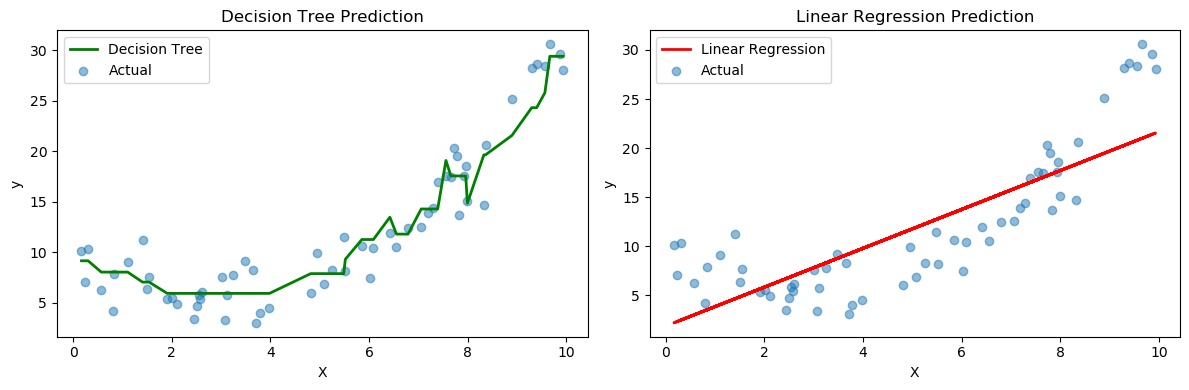

In [232]:
# Generate quadratic data
X1 = np.linspace(0, 10, 300).reshape(-1, 1)
y1 = 0.5 * X1.ravel()**2 - 3 * X1.ravel() + 10 + np.random.normal(0, 2, 300)


# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train models
dt1 = DecisionTreeRegressor(max_depth=5, random_state=42)
lr1 = LinearRegression()

dt1.fit(X1_train, y1_train)
lr1.fit(X1_train, y1_train)

# Predictions
y1_pred_dt = dt1.predict(X1_test)
y1_pred_lr = lr1.predict(X1_test)

# Metrics
print(f"Decision Tree - MSE: {mean_squared_error(y1_test, y1_pred_dt):.2f}, R²: {r2_score(y1_test, y1_pred_dt):.3f}")
print(f"Linear Regression - MSE: {mean_squared_error(y1_test, y1_pred_lr):.2f}, R²: {r2_score(y1_test, y1_pred_lr):.3f}")
print(f"Winner: {'Decision Tree ✓' if mean_squared_error(y1_test, y1_pred_dt) < mean_squared_error(y1_test, y1_pred_lr) else 'Linear Regression ✓'}")

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X1_test, y1_test, alpha=0.5, label='Actual')
plt.plot(np.sort(X1_test, axis=0), dt1.predict(np.sort(X1_test, axis=0)), 'g-', linewidth=2, label='Decision Tree')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Decision Tree Prediction')

plt.subplot(1, 2, 2)
plt.scatter(X1_test, y1_test, alpha=0.5, label='Actual')
plt.plot(X1_test, y1_pred_lr, 'r-', linewidth=2, label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Prediction')
plt.tight_layout()

#### DT vs LR for Feature interaction
- `y = (x₁ * 3 * x₂) / 10  + error`
- 

(300, 2) (300,)
X2: [[4.681764   5.0141403 ]
 [9.2298749  4.04410222]
 [3.73290621 1.67992813]
 [5.59665841 2.96755085]
 [9.54722685 7.91656236]]
y2: [12.97448353 14.99862912  1.04639571  6.13779432 59.09661404]
Decision Tree - MSE: 1.68, R²: 0.452
Linear Regression - MSE: 1.02, R²: 0.670
Winner: Linear Regression ✓
Plot saved as 'scenario2_interactions.png'



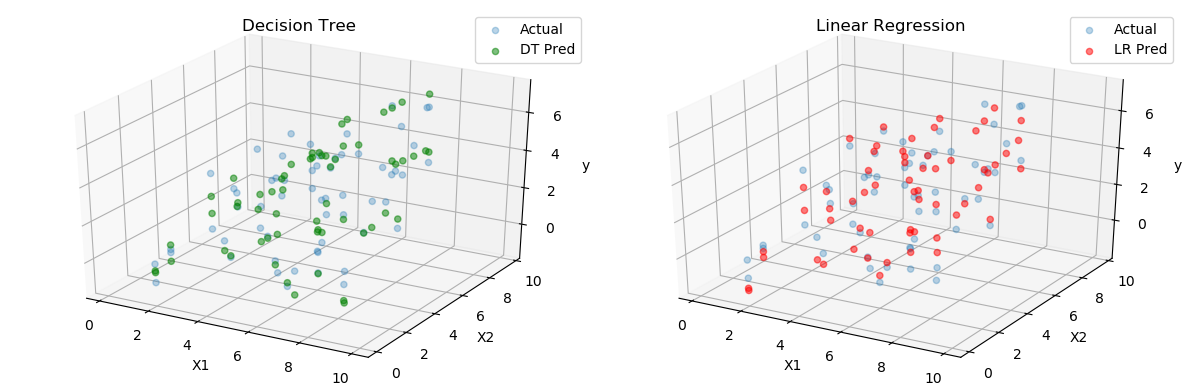

In [239]:
n_samples = 300
X2 = np.random.rand(n_samples, 2) * 10. # X2 has 2 features.
y2 = (X2[:, 0] * (X2[:, 1])**2) / 10 + np.random.normal(0, 1, n_samples) # lets derive y2 by multiplying X2 features and adding some noise

print(X2.shape, y2.shape)
print(f"X2: {X2[:5]}")
print(f"y2: {y2[:5]}")

# Train models
dt2 = DecisionTreeRegressor(max_depth=6, random_state=42)
lr2 = LinearRegression()

dt2.fit(X2_train, y2_train)
lr2.fit(X2_train, y2_train)

# Predictions
y2_pred_dt = dt2.predict(X2_test)
y2_pred_lr = lr2.predict(X2_test)

# Metrics
print(f"Decision Tree - MSE: {mean_squared_error(y2_test, y2_pred_dt):.2f}, R²: {r2_score(y2_test, y2_pred_dt):.3f}")
print(f"Linear Regression - MSE: {mean_squared_error(y2_test, y2_pred_lr):.2f}, R²: {r2_score(y2_test, y2_pred_lr):.3f}")
print(f"Winner: {'Decision Tree ✓' if mean_squared_error(y2_test, y2_pred_dt) < mean_squared_error(y2_test, y2_pred_lr) else 'Linear Regression ✓'}")


# Plot
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(X2_test[:, 0], X2_test[:, 1], y2_test, alpha=0.3, label='Actual')
ax1.scatter(X2_test[:, 0], X2_test[:, 1], y2_pred_dt, alpha=0.5, c='green', label='DT Pred')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('y')
ax1.set_title('Decision Tree')
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(X2_test[:, 0], X2_test[:, 1], y2_test, alpha=0.3, label='Actual')
ax2.scatter(X2_test[:, 0], X2_test[:, 1], y2_pred_lr, alpha=0.5, c='red', label='LR Pred')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('y')
ax2.set_title('Linear Regression')
ax2.legend()

plt.tight_layout()
plt.savefig('scenario2_interactions.png', dpi=150, bbox_inches='tight')
print("Plot saved as 'scenario2_interactions.png'\n")


#### DT vs LR for data having Outlier


Decision Tree - MSE (excluding outliers): 78.87
Linear Regression - MSE (excluding outliers): 29.93
Winner: Linear Regression ✓
Plot saved as 'scenario3_outliers.png'



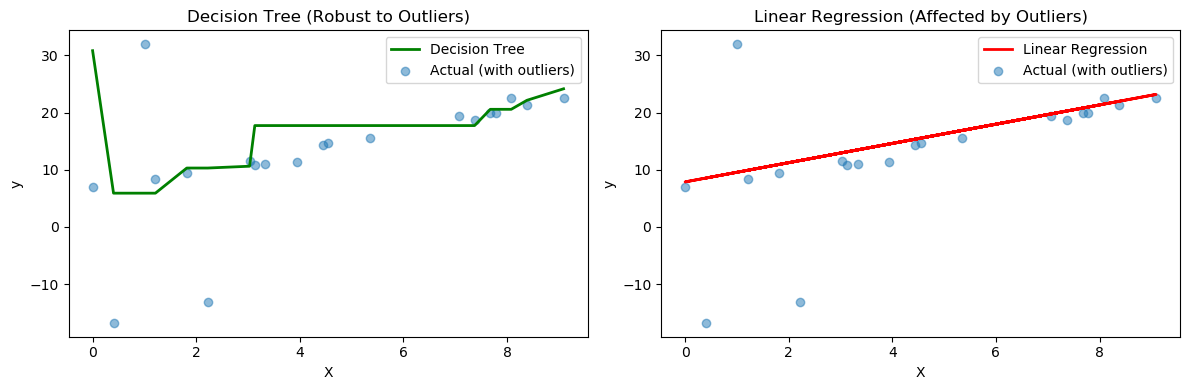

In [244]:
# Generate linear data with outliers
X3 = np.linspace(0, 10, 100).reshape(-1, 1)
y3 = 2 * X3.ravel() + 5 + np.random.normal(0, 1, 100)

# Add outliers
outlier_indices = [1,4,6,8,10,15,22,25,32,35, 40]
y3[outlier_indices] += np.random.choice([25, -25], size=len(outlier_indices))

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Train models
dt3 = DecisionTreeRegressor(max_depth=4, random_state=42)
lr3 = LinearRegression()

dt3.fit(X3_train, y3_train)
lr3.fit(X3_train, y3_train)

# Predictions
y3_pred_dt = dt3.predict(X3_test)
y3_pred_lr = lr3.predict(X3_test)

# Calculate MSE excluding outliers for fair comparison
mask = np.abs(y3_test - np.median(y3_test)) < 20
print(f"Decision Tree - MSE (excluding outliers): {mean_squared_error(y3_test[mask], y3_pred_dt[mask]):.2f}")
print(f"Linear Regression - MSE (excluding outliers): {mean_squared_error(y3_test[mask], y3_pred_lr[mask]):.2f}")
print(f"Winner: {'Decision Tree ✓' if mean_squared_error(y3_test[mask], y3_pred_dt[mask]) < mean_squared_error(y3_test[mask], y3_pred_lr[mask]) else 'Linear Regression ✓'}")

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X3_test, y3_test, alpha=0.5, label='Actual (with outliers)')
plt.plot(np.sort(X3_test, axis=0), dt3.predict(np.sort(X3_test, axis=0)), 'g-', linewidth=2, label='Decision Tree')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Decision Tree (Robust to Outliers)')

plt.subplot(1, 2, 2)
plt.scatter(X3_test, y3_test, alpha=0.5, label='Actual (with outliers)')
plt.plot(X3_test, y3_pred_lr, 'r-', linewidth=2, label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression (Affected by Outliers)')
plt.tight_layout()
plt.savefig('scenario3_outliers.png', dpi=150, bbox_inches='tight')
print("Plot saved as 'scenario3_outliers.png'\n")


#### TRUE line relationship(LR Wins)

Decision Tree - MSE: 4.82, R²: 0.942
Linear Regression - MSE: 2.84, R²: 0.966
Winner: Linear Regression ✓
Plot saved as 'scenario4_linear.png'



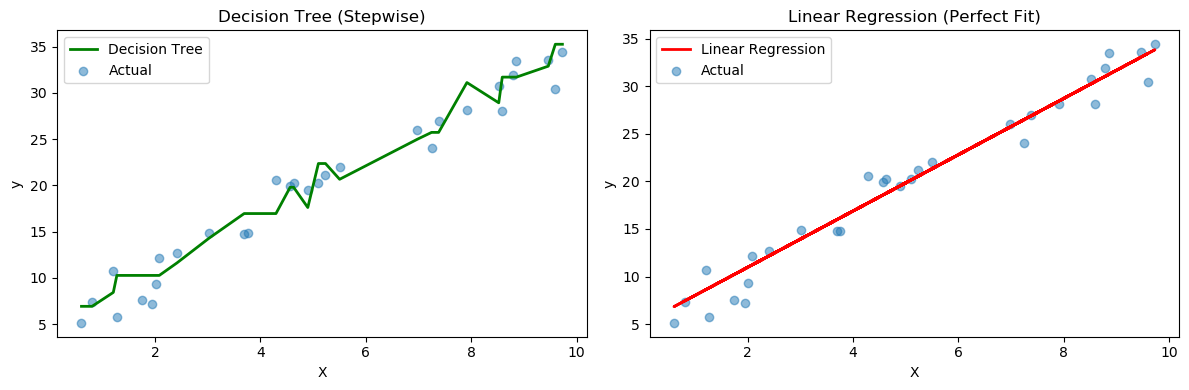

In [245]:

# Generate perfect linear data
X4 = np.linspace(0, 10, 150).reshape(-1, 1)
y4 = 3 * X4.ravel() + 5 + np.random.normal(0, 1.5, 150)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Train models
dt4 = DecisionTreeRegressor(max_depth=5, random_state=42)
lr4 = LinearRegression()

dt4.fit(X4_train, y4_train)
lr4.fit(X4_train, y4_train)

# Predictions
y4_pred_dt = dt4.predict(X4_test)
y4_pred_lr = lr4.predict(X4_test)

# Metrics
print(f"Decision Tree - MSE: {mean_squared_error(y4_test, y4_pred_dt):.2f}, R²: {r2_score(y4_test, y4_pred_dt):.3f}")
print(f"Linear Regression - MSE: {mean_squared_error(y4_test, y4_pred_lr):.2f}, R²: {r2_score(y4_test, y4_pred_lr):.3f}")
print(f"Winner: {'Decision Tree ✓' if mean_squared_error(y4_test, y4_pred_dt) < mean_squared_error(y4_test, y4_pred_lr) else 'Linear Regression ✓'}")

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X4_test, y4_test, alpha=0.5, label='Actual')
plt.plot(np.sort(X4_test, axis=0), dt4.predict(np.sort(X4_test, axis=0)), 'g-', linewidth=2, label='Decision Tree')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Decision Tree (Stepwise)')

plt.subplot(1, 2, 2)
plt.scatter(X4_test, y4_test, alpha=0.5, label='Actual')
plt.plot(X4_test, y4_pred_lr, 'r-', linewidth=2, label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression (Perfect Fit)')
plt.tight_layout()
plt.savefig('scenario4_linear.png', dpi=150, bbox_inches='tight')
print("Plot saved as 'scenario4_linear.png'\n")

#### SMOOTH PREDICTIONS NEEDED (LR with Polynomial Wins)

Decision Tree - MSE: 0.33, R²: 0.976
Polynomial LR - MSE: 0.82, R²: 0.942
Winner: Decision Tree ✓
Plot saved as 'scenario5_smooth.png'

SCENARIO 6: LIMITED TRAINING DATA
Training samples: 21
Decision Tree - MSE: 13.39, R²: 0.606
Linear Regression - MSE: 7.47, R²: 0.780
Winner: Linear Regression ✓
Plot saved as 'scenario6_small_data.png'



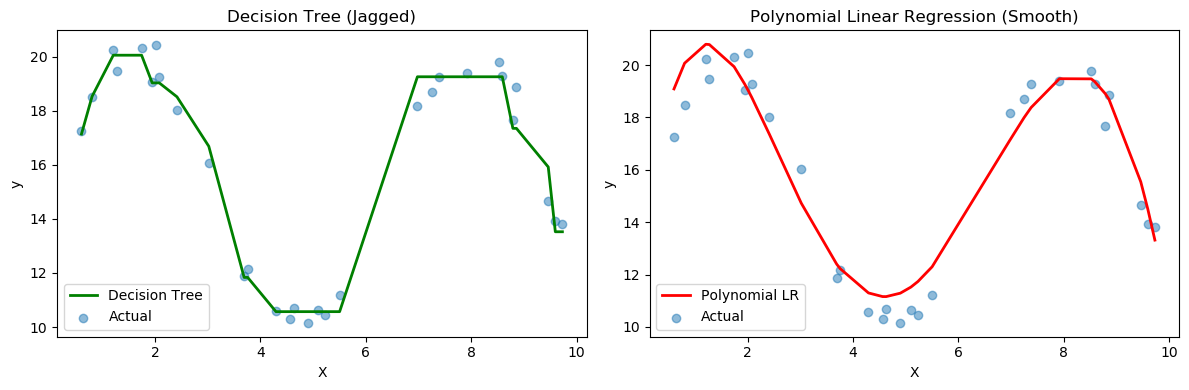

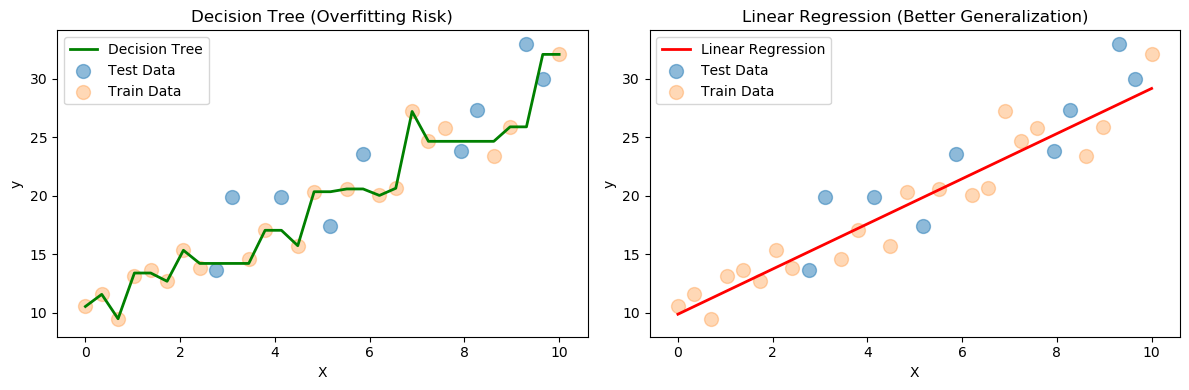

In [246]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate sinusoidal data
X5 = np.linspace(0, 10, 150).reshape(-1, 1)
y5 = np.sin(X5.ravel()) * 5 + 15 + np.random.normal(0, 0.5, 150)

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Train models
dt5 = DecisionTreeRegressor(max_depth=5, random_state=42)
poly_lr5 = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())

dt5.fit(X5_train, y5_train)
poly_lr5.fit(X5_train, y5_train)

# Predictions
y5_pred_dt = dt5.predict(X5_test)
y5_pred_lr = poly_lr5.predict(X5_test)

# Metrics
print(f"Decision Tree - MSE: {mean_squared_error(y5_test, y5_pred_dt):.2f}, R²: {r2_score(y5_test, y5_pred_dt):.3f}")
print(f"Polynomial LR - MSE: {mean_squared_error(y5_test, y5_pred_lr):.2f}, R²: {r2_score(y5_test, y5_pred_lr):.3f}")
print(f"Winner: {'Decision Tree ✓' if mean_squared_error(y5_test, y5_pred_dt) < mean_squared_error(y5_test, y5_pred_lr) else 'Polynomial Linear Regression ✓'}")

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X5_test, y5_test, alpha=0.5, label='Actual')
plt.plot(np.sort(X5_test, axis=0), dt5.predict(np.sort(X5_test, axis=0)), 'g-', linewidth=2, label='Decision Tree')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Decision Tree (Jagged)')

plt.subplot(1, 2, 2)
plt.scatter(X5_test, y5_test, alpha=0.5, label='Actual')
X5_sorted = np.sort(X5_test, axis=0)
plt.plot(X5_sorted, poly_lr5.predict(X5_sorted), 'r-', linewidth=2, label='Polynomial LR')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Linear Regression (Smooth)')
plt.tight_layout()
plt.savefig('scenario5_smooth.png', dpi=150, bbox_inches='tight')
print("Plot saved as 'scenario5_smooth.png'\n")

# ============================================================================
# SCENARIO 6: SMALL DATASET (LR Wins)
# ============================================================================
print("=" * 70)
print("SCENARIO 6: LIMITED TRAINING DATA")
print("=" * 70)

# Generate small linear dataset
X6_small = np.linspace(0, 10, 30).reshape(-1, 1)
y6_small = 2 * X6_small.ravel() + 10 + np.random.normal(0, 2, 30)

X6_train, X6_test, y6_train, y6_test = train_test_split(X6_small, y6_small, test_size=0.3, random_state=42)

print(f"Training samples: {len(X6_train)}")

# Train models
dt6 = DecisionTreeRegressor(max_depth=5, random_state=42)
lr6 = LinearRegression()

dt6.fit(X6_train, y6_train)
lr6.fit(X6_train, y6_train)

# Predictions
y6_pred_dt = dt6.predict(X6_test)
y6_pred_lr = lr6.predict(X6_test)

# Metrics
print(f"Decision Tree - MSE: {mean_squared_error(y6_test, y6_pred_dt):.2f}, R²: {r2_score(y6_test, y6_pred_dt):.3f}")
print(f"Linear Regression - MSE: {mean_squared_error(y6_test, y6_pred_lr):.2f}, R²: {r2_score(y6_test, y6_pred_lr):.3f}")
print(f"Winner: {'Decision Tree ✓' if mean_squared_error(y6_test, y6_pred_dt) < mean_squared_error(y6_test, y6_pred_lr) else 'Linear Regression ✓'}")

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X6_test, y6_test, alpha=0.5, s=100, label='Test Data')
plt.scatter(X6_train, y6_train, alpha=0.3, s=100, label='Train Data')
plt.plot(np.sort(X6_small, axis=0), dt6.predict(np.sort(X6_small, axis=0)), 'g-', linewidth=2, label='Decision Tree')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Decision Tree (Overfitting Risk)')

plt.subplot(1, 2, 2)
plt.scatter(X6_test, y6_test, alpha=0.5, s=100, label='Test Data')
plt.scatter(X6_train, y6_train, alpha=0.3, s=100, label='Train Data')
plt.plot(X6_small, lr6.predict(X6_small), 'r-', linewidth=2, label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression (Better Generalization)')
plt.tight_layout()
plt.savefig('scenario6_small_data.png', dpi=150, bbox_inches='tight')
print("Plot saved as 'scenario6_small_data.png'\n")
